<a href="https://colab.research.google.com/github/Brokerus/DA_Projects/blob/main/The_success_of_the_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
----
# IDENTIFICATION OF REGULARITIES DETERMINING THE SUCCESS OF THE GAME
**Project description**:

The Strimchik online store sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms are available from open sources.

**Games.csv** data description:

**Name** - the name of the game

**Platform** - platform

**Year_of_Release** - year of release

**Genre** - game genre

**NA_sales** - Sales in North America (millions of dollars)

**EU_sales** - sales in Europe (millions of dollars)

**JP_sales** - sales in Japan (millions of dollars)

**Other_sales** - sales in other countries (millions of dollars)

**Critic_Score** - Critics score (from 0 to 100)

**User_Score** - user score (from 0 to 10)

**Rating** - rating from the **ESRB** (Entertainment Software Rating Board).

This association determines the rating of computer games and assigns them an appropriate age category.

**Exercise:**
To identify the patterns that determine the success of the game and determine, for further planning of advertising campaigns, a potentially popular product for the next year (**2017**).

**Stages:**
* Obtaining data and their primary analysis;
* Data preprocessing: replacing column names, changing data types, processing gaps, eliminating duplicates, outliers, adding new data;
* Exploratory data analysis: determining the number of released games by year, the leading now and popular platforms in the past, the impact of critic and user ratings on sales, the overall distribution of games by genre;
* Drawing up a portrait of the user by region: determining the top 5 popular platforms and genres, the impact of the **ESRB** rating;
* Conducting a study of statistical indicators: changing the rating of critics and users in various genres;
* Hypothesis testing: average user ratings of **Xbox One** and **PC** platforms are the same, and average user ratings of **Action** and **Sports** genres are different;
* Research results

#Stage 1. Data acquisition

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

Read the **games.csv** file and store it in the **success_games** variable.

In [152]:
success_games = pd.read_csv('/content/drive/MyDrive/The success of the game/games.csv')

Get the first **10** rows of the table.

In [153]:
success_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


General information about table data **success_games**.

In [154]:
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are **11** columns in the table, **6** of them have data type **float64**, and the rest **5** data type **object**. Quantity
the values in the columns differ. This indicates that there is not enough data in some columns, and in others
there are redundant values.

**Conclusions**

Each row of the table contains information about the game released on a specific platform, in
a certain year, a specific genre, with information about sales in different countries, ratings as critics,
and users and their own age rating. Four problems to be solved:
poor-quality column names, data type conversion, omission handling (which could
appear as a result of the fact that there is not enough data or there were problems with recording it, you can try
replace them with **'unknown'**) and determine the total sales. Especially useful for testing working hypotheses.
columns **User_Score** and **Platform** and **Genre**.

#Stage 2. Data preprocessing

We will replace the names of the columns, convert the data to the required types, process the gaps, calculate the total
sales in all regions, as well as check the data for duplicates.

Let's rename the columns for convenience in subsequent processing.

In [155]:
success_games.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales' : 'na_sales',
                                'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score',
                                'User_Score' : 'user_score', 'Rating' : 'rating'}, inplace = True)

Convert the **float64** data type in the **year_of release** and **critic_score** columns to **int** in order to get rid of
extra digits after the decimal point.

In [156]:
try:
  success_games['year_of_release'] = success_games['year_of_release'].astype('int')
except:
  success_games['year_of_release'] == 'NaN'
success_games['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

In [157]:
try:
  success_games['critic_score'] = success_games['critic_score'].astype('int')
except:
  success_games['critic_score'] == 'NaN'
success_games['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

In [158]:
success_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [159]:
success_games.isnull()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


Check data for spaces

In [160]:
success_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Empty values mean that not all information is available for some games. The reasons for this may be
are different: the recent release of the game, as evidenced by the abbreviation **tbd** (from the English. **To Be Determined** - will be
defined) in the columns with a rating, or there are problems with data recording.

**tbd** is replaced by **NaN**. Missing values are removed due to, so that there are no problems in the future.

In [161]:
success_games.loc[success_games['user_score'] == 'tbd', 'user_score'] = float('NaN')

In [162]:
success_games.dropna(subset = ['name', 'genre'], inplace = True)
success_games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [163]:
success_games['user_score'] = success_games['user_score'].astype('float')

In [164]:
success_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Check for duplicates.

In [165]:
success_games.duplicated().sum()

0

In [166]:
success_games = success_games.reset_index(drop = True)
success_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Let's calculate the total sales in all regions and write them down in a separate column.

In [167]:
success_games['sum_sales'] = success_games['na_sales'] + success_games['eu_sales'] + success_games['jp_sales'] + success_games['other_sales']
success_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Conclusions**

At the preprocessing stage, gaps and problems with column names were found in the data, the presence of duplicates was not established. Since it is important to save user rating information for analysis, we not only remove all missing values, but also fill in the missing critics' ratings and rating. The column names are now correct and convenient for further work.

#Stage 3. Exploratory data analysis#

Find how many games were released in different years.

In [168]:
success_games.groupby('year_of_release')['name'].count().sort_values(ascending = False)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: name, dtype: int64

Data for the period from 1980 to 1994 inclusive is not particularly important,
because they are very small in comparison with data for other years.

Find platforms with the highest total sales and plot the distribution by year.

<Axes: xlabel='platform', ylabel='sum_sales'>

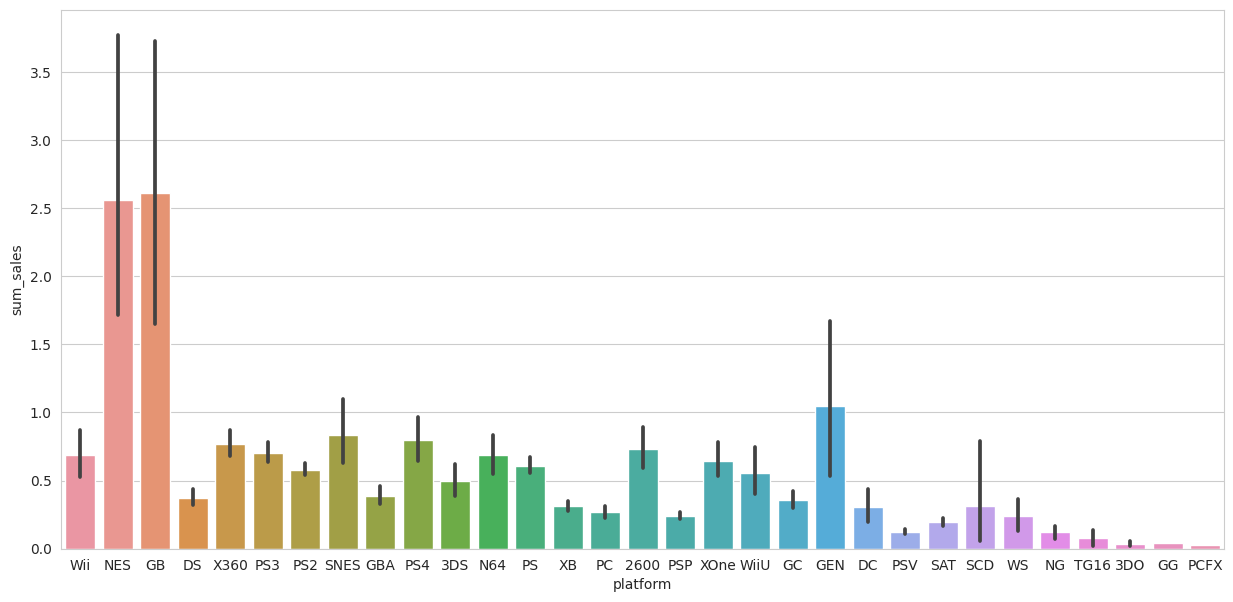

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
sns.barplot(data = success_games, x='platform', y='sum_sales')

<Axes: xlabel='year_of_release'>

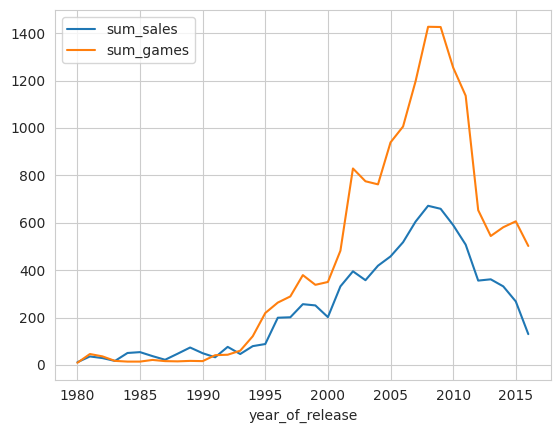

In [170]:
year_sale_games = success_games.groupby('year_of_release')[['sum_sales']].sum().join(success_games.groupby('year_of_release')[['name']].count())
year_sale_games.columns = ['sum_sales', 'sum_games']
year_sale_games.plot()

Most games released in **2008** and **2009**

Let's find for what period new platforms appear, and the old ones disappear.

In [171]:
platform_top = success_games.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending=False)
platform_top = platform_top.head(10).reset_index()

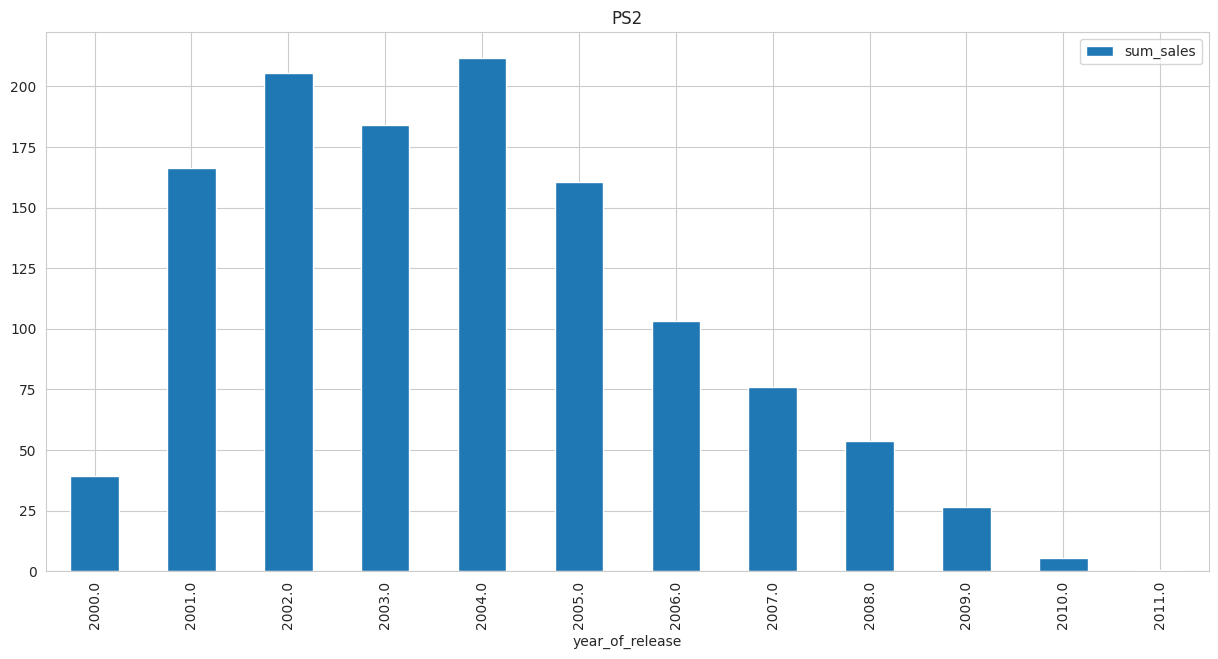

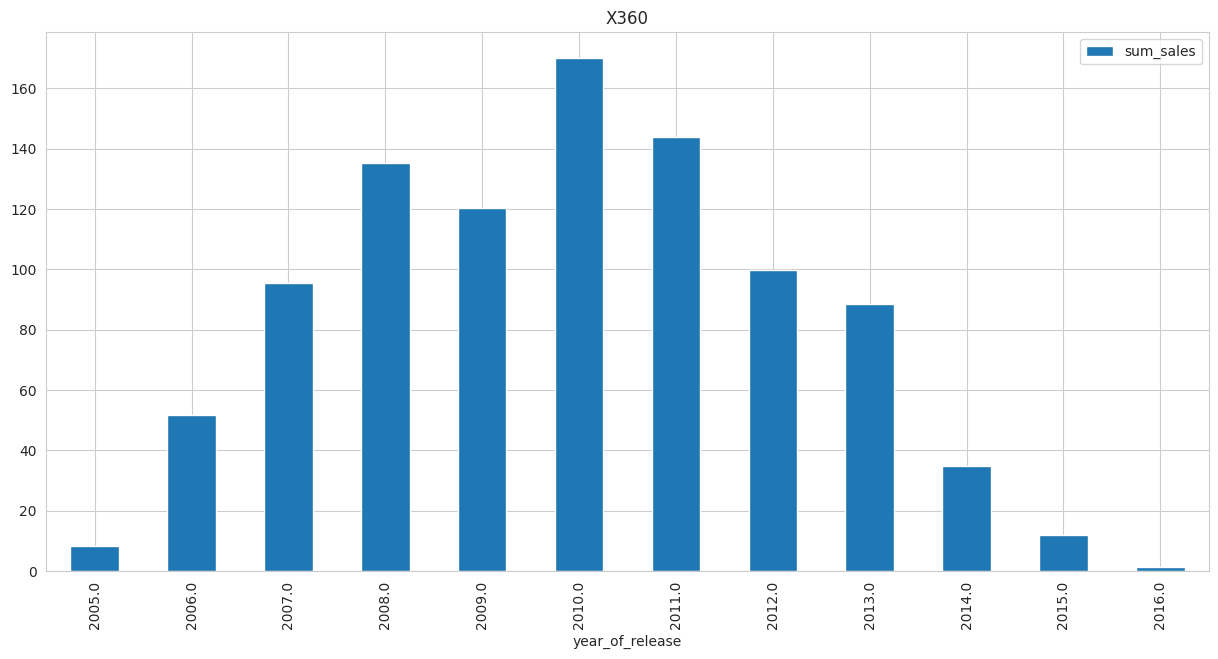

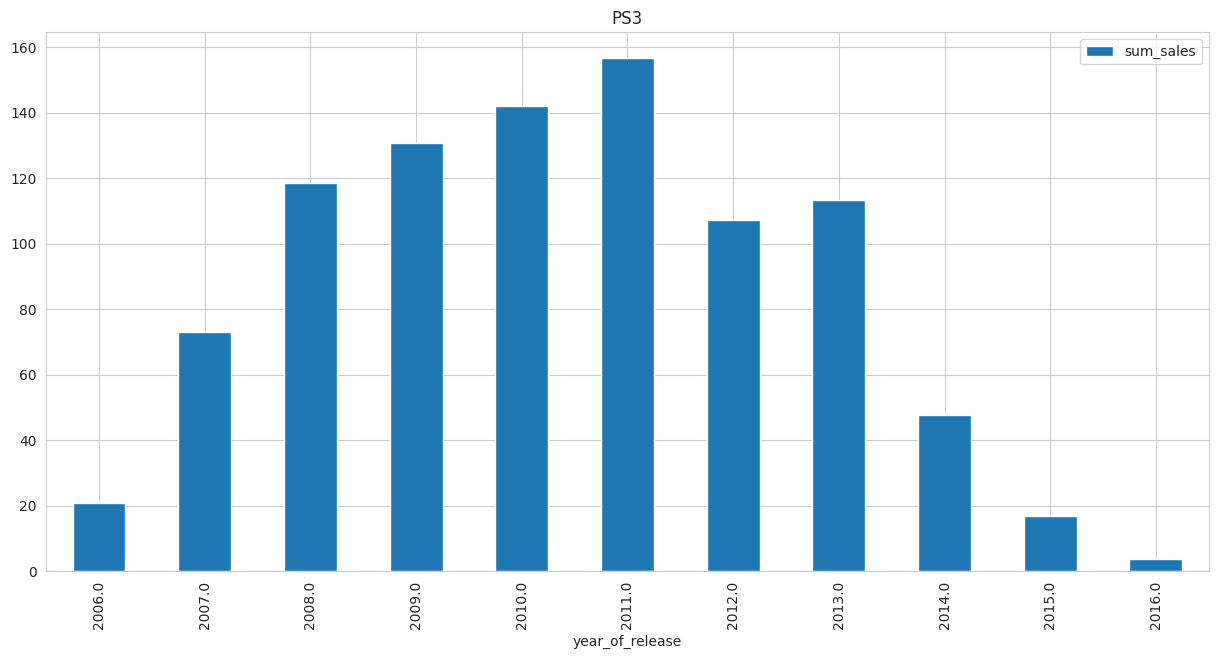

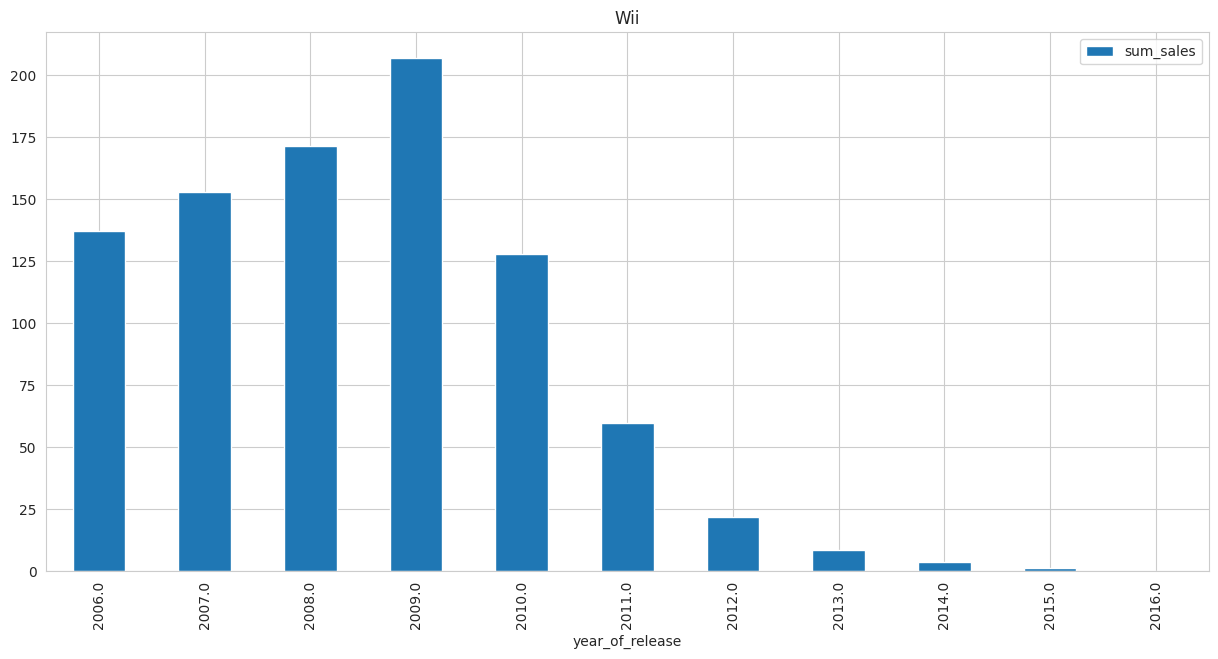

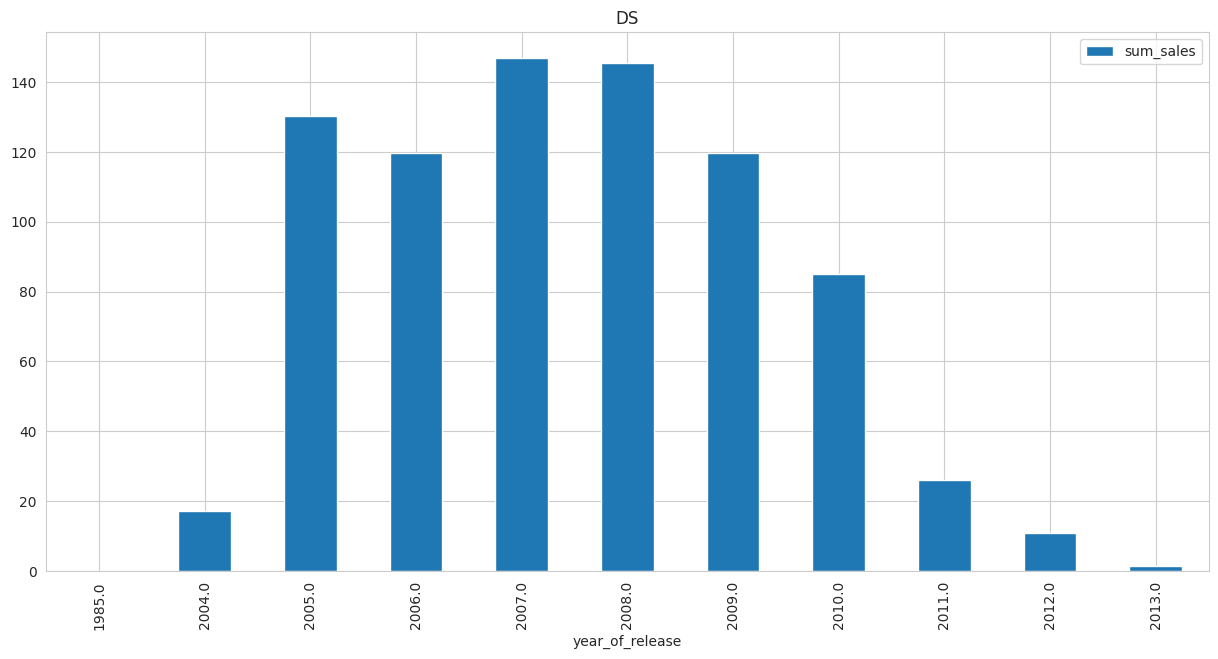

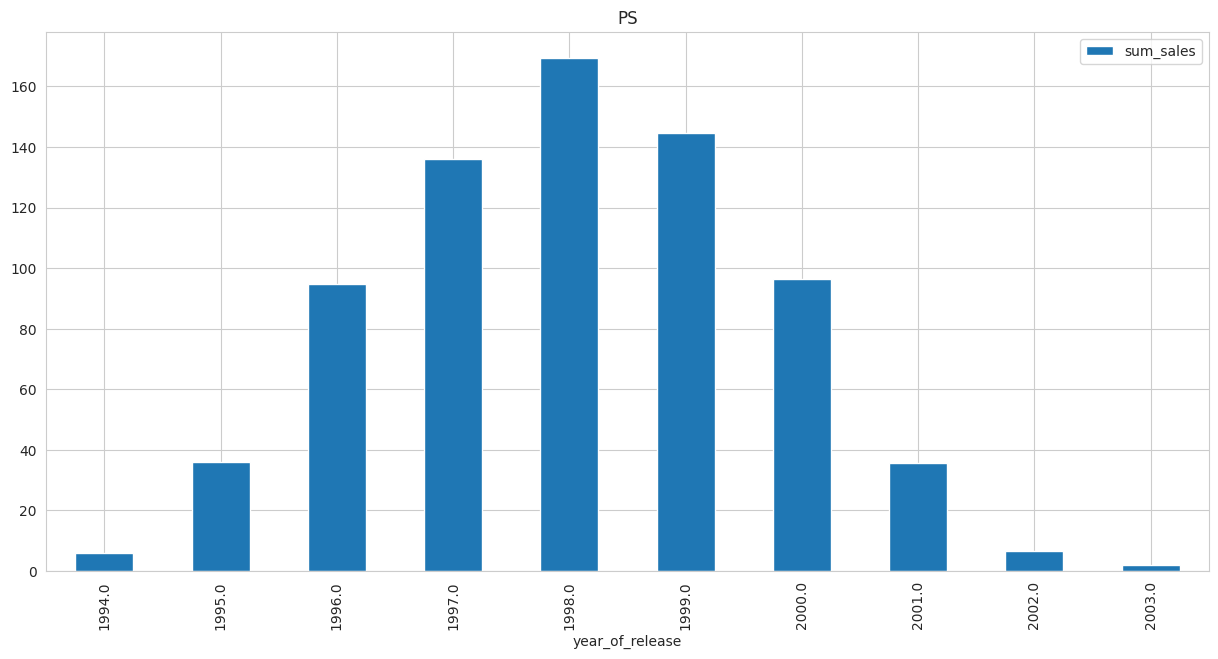

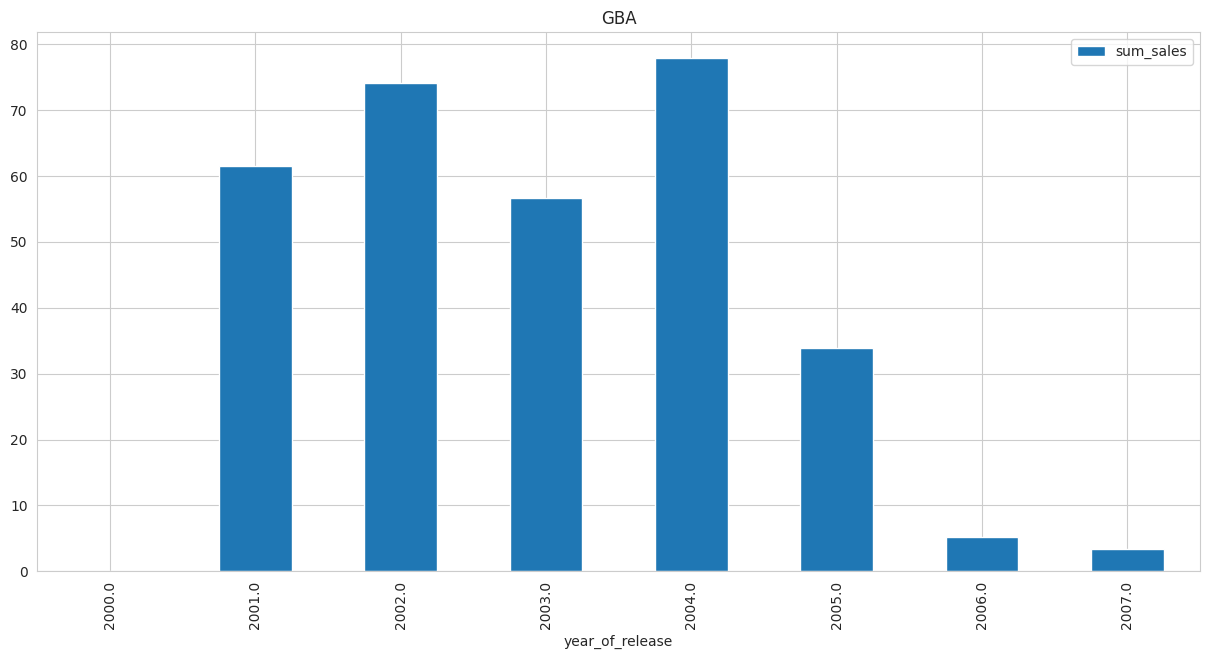

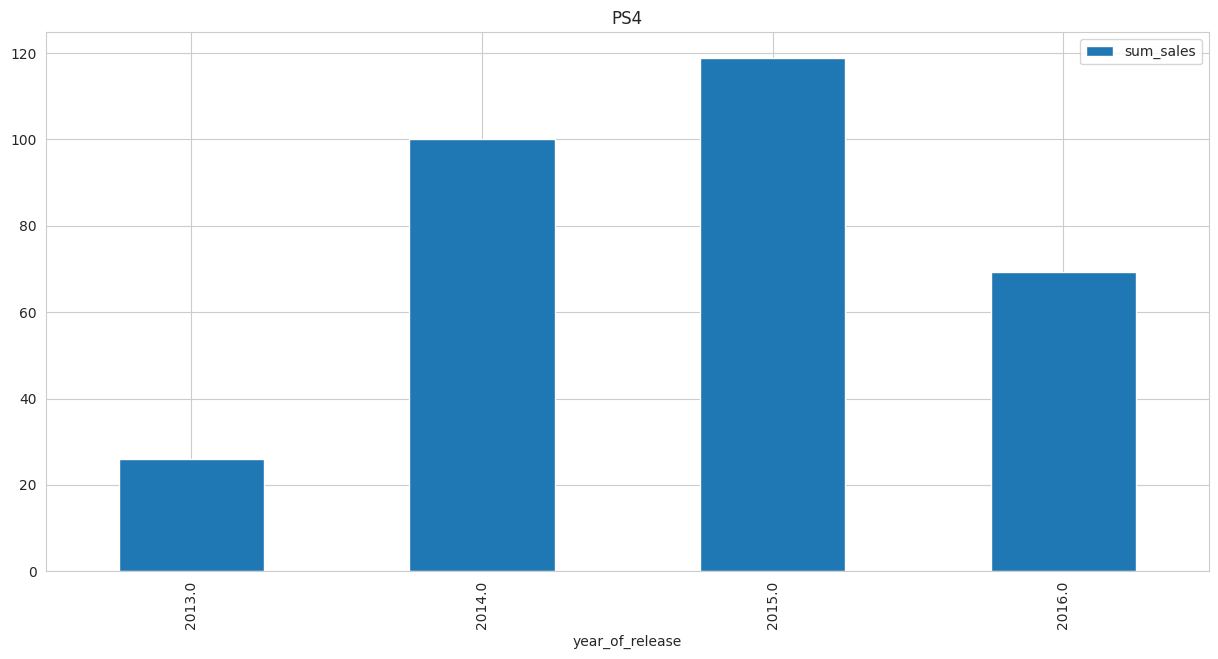

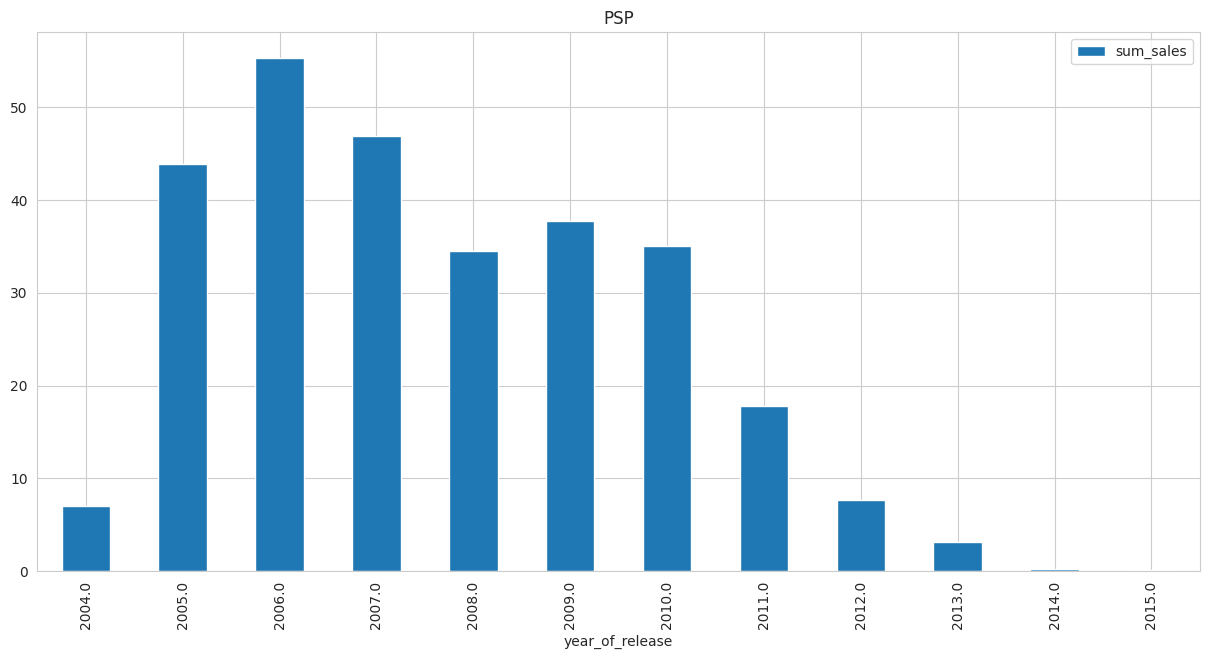

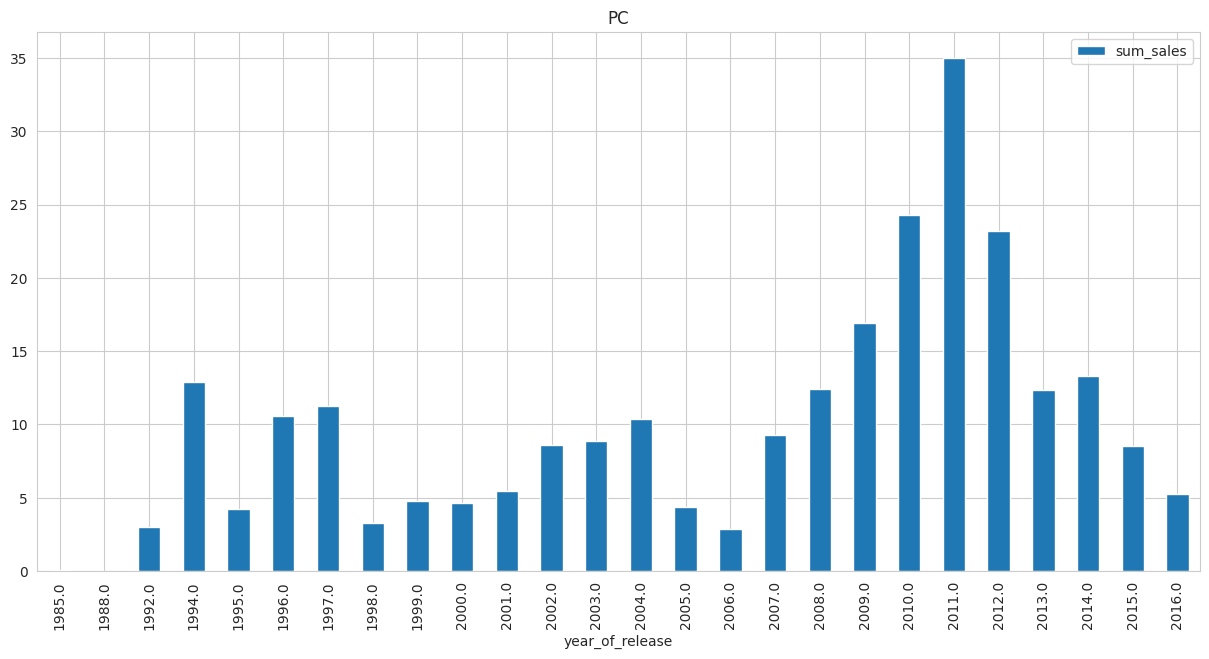

In [172]:
platform_top_10 = platform_top['platform'].unique()
for platform in platform_top_10:
  success_games[success_games['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar', figsize=(15,7))
  plt.title(platform)

<Axes: xlabel='year_of_release'>

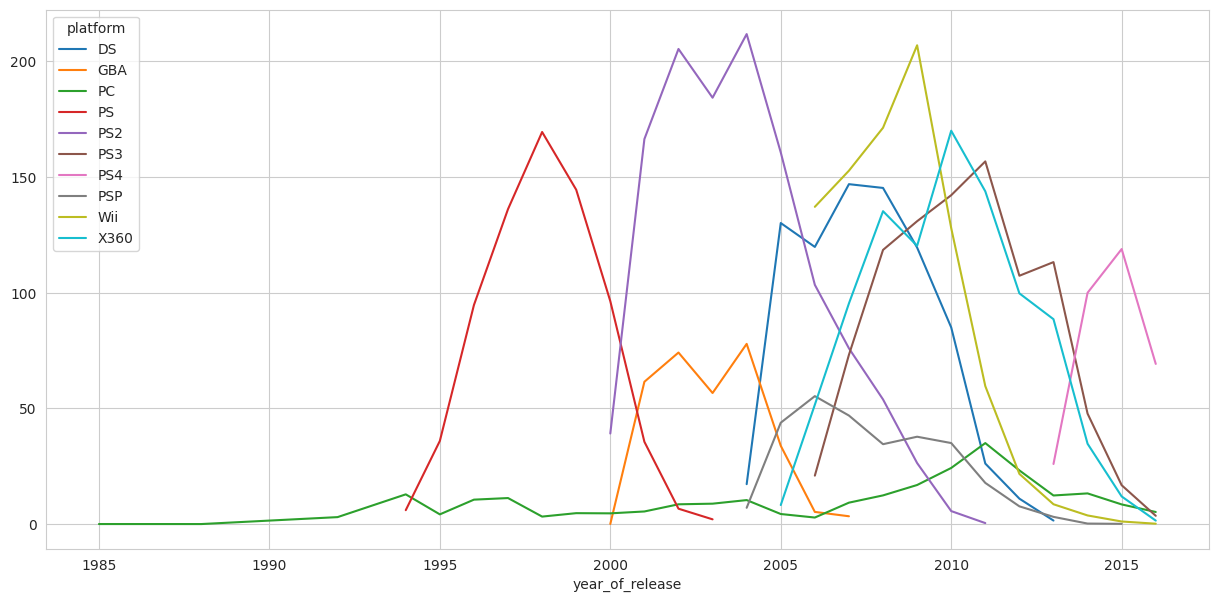

In [173]:
success_games.query('platform in @platform_top_10').pivot_table(index='year_of_release',
columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(15, 7))

In the past, **NES**, **GB** and **GEN** platforms were popular. On average, new platforms appear, and old ones disappear in **10** years.

Let's take a cut from **2012** to cut off data on old platforms, and also remove data from the **PS3** platform because its support is ending.

In [174]:
new_success_games = success_games.query('year_of_release > 2012')
new_success_games = new_success_games.loc[new_success_games['platform'] != 'PS3']
new_success_games.reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
2,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
3,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1883,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1884,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1885,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1886,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [175]:
new_success_games = new_success_games.loc[new_success_games['sum_sales'] < new_success_games['sum_sales'].quantile(.75)]
new_success_games.reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,F1 2016 (Codemasters),PS4,2016.0,Racing,0.03,0.29,0.01,0.05,NaN,NaN,NaN,0.38
1,Resident Evil Zero,PS4,2016.0,Action,0.10,0.17,0.05,0.05,NaN,NaN,NaN,0.37
2,Persona 5,PS4,2016.0,Role-Playing,0.00,0.00,0.37,0.00,NaN,NaN,NaN,0.37
3,BioShock The Collection,PS4,2016.0,Shooter,0.10,0.19,0.02,0.06,84.0,8.5,M,0.37
4,Rocket League,PS4,2016.0,Sports,0.03,0.28,0.00,0.05,85.0,8.7,E,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1402,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1403,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1404,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1405,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Let's find platforms that are leading in sales and choose potentially profitable ones.

<Axes: xlabel='platform', ylabel='sum_sales'>

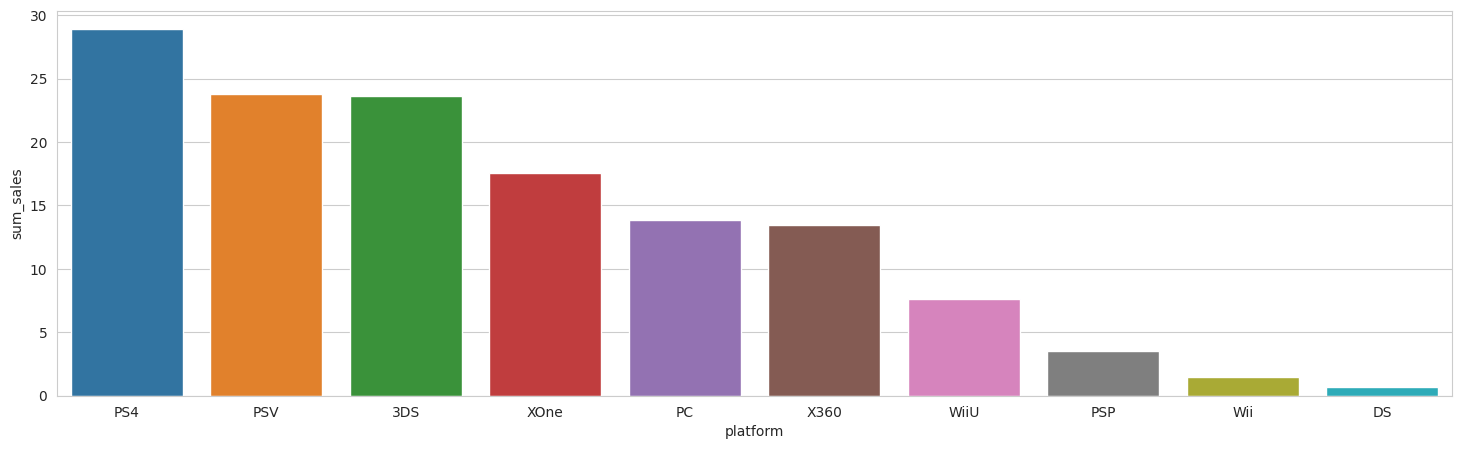

In [176]:
profit_platforms = new_success_games.pivot_table(index=['platform'],
                                                 values='sum_sales',aggfunc='sum').reset_index().sort_values(by='sum_sales', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = profit_platforms, x='platform', y='sum_sales')

Potentially profitable platforms: **PS4, PSV, 3DS, XOne, PC.**

Let's build a “box-and-whiskers” chart for global sales and a breakdown by platform.

<Axes: title={'center': 'sum_sales'}, xlabel='platform'>

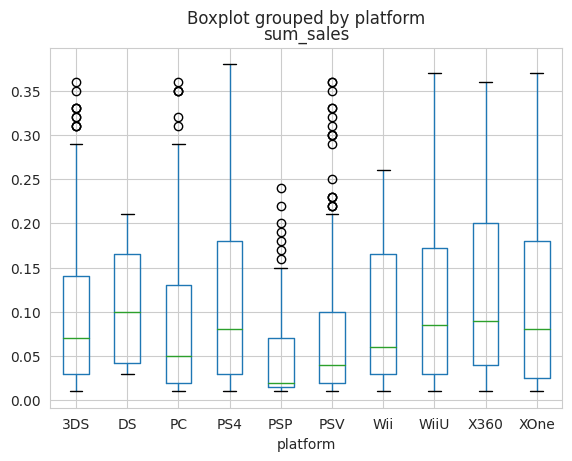

In [177]:
new_success_games.boxplot(column = 'sum_sales', by = 'platform')

The difference in sales of various platforms on different platforms is due to the interests of consumers in games or world fame, but on average at the same level.

Let's find out how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales

<Axes: xlabel='critic_score', ylabel='sum_sales'>

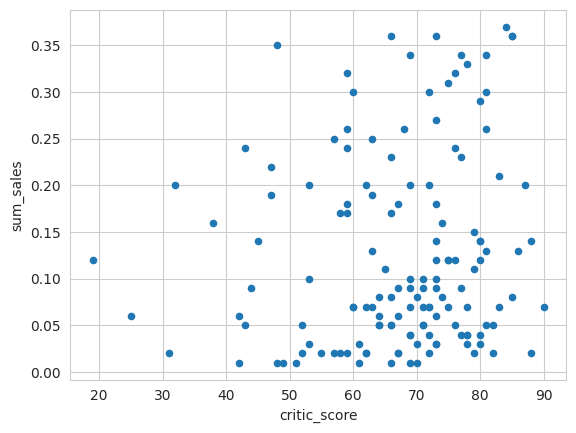

In [178]:
PS4 = new_success_games.query('platform == "PS4"')
PS4.plot(x='critic_score', y='sum_sales', kind='scatter')

In [179]:
PS4['critic_score'].corr(PS4['sum_sales'])

0.12930762458006995

<Axes: xlabel='user_score', ylabel='sum_sales'>

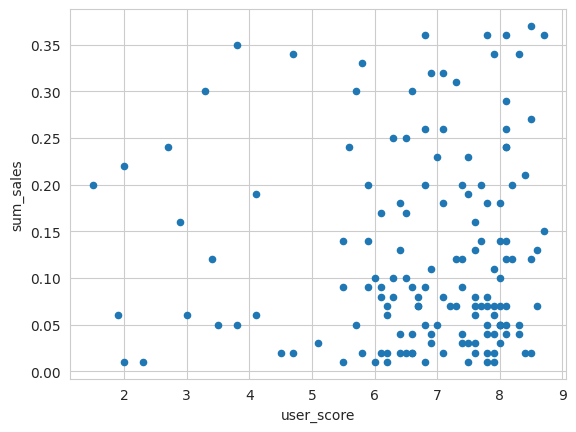

In [180]:
PS4.plot(x='user_score', y='sum_sales', kind='scatter')

In [181]:
PS4['user_score'].corr(PS4['sum_sales'])

0.020475470767065202

<Axes: xlabel='critic_score', ylabel='sum_sales'>

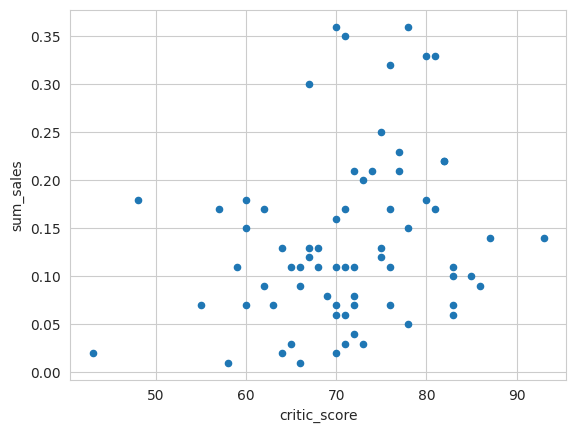

In [182]:
PSV = new_success_games.query('platform == "PSV"')
PSV.plot(x='critic_score', y='sum_sales', kind='scatter')

<Axes: xlabel='user_score', ylabel='sum_sales'>

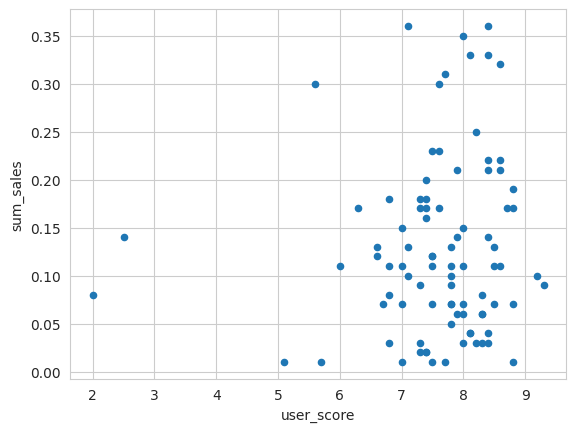

In [183]:
PSV.plot(x='user_score', y='sum_sales', kind='scatter')

In [184]:
PSV['critic_score'].corr(PSV['sum_sales'])

0.2443522724833453

In [185]:
PSV['user_score'].corr(PSV['sum_sales'])

0.09165856214236758

Let's find out the distribution of games by genre, find the most and least profitable genre.

In [186]:
new_success_games.groupby('genre')['name'].count().sort_values(ascending = False)

genre
Action          509
Adventure       204
Role-Playing    180
Misc            103
Sports           94
Shooter          70
Racing           55
Strategy         48
Simulation       46
Fighting         45
Platform         40
Puzzle           13
Name: name, dtype: int64

<Axes: xlabel='platform'>

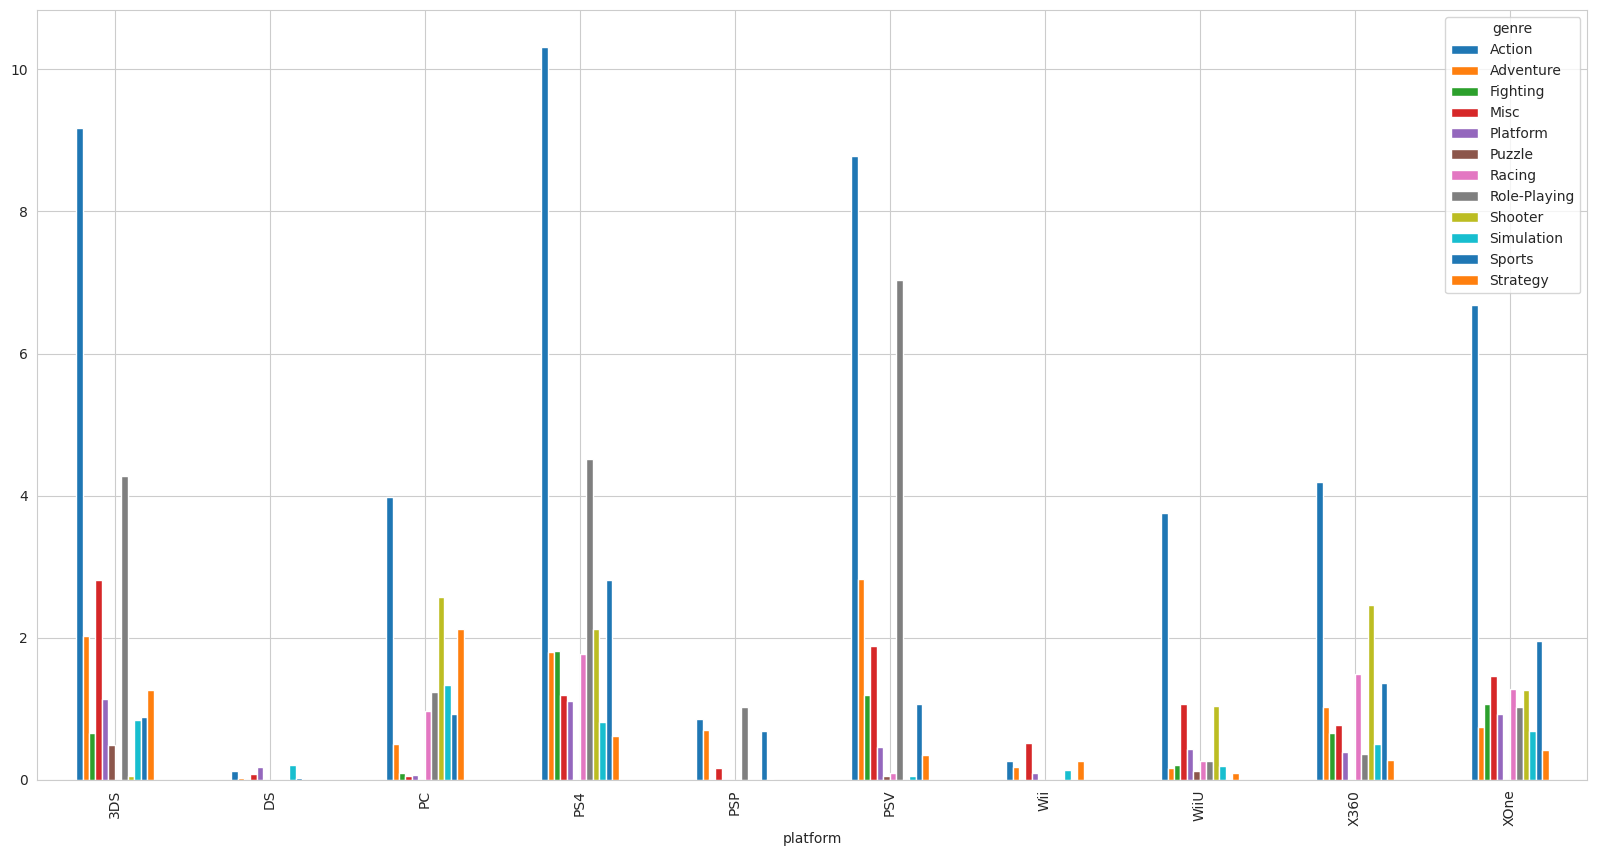

In [187]:
new_success_games.pivot_table(index='platform',columns = 'genre', values ='sum_sales',aggfunc='sum').plot(kind = 'bar' , figsize=(20, 10))

The graph shows that the most profitable genre across all platforms is **Action**, while the opposite genre is **Puzzle**.

# Stage 4. Drawing up a portrait of the user by region

Let's find the top **5** most popular platforms by region.

<Axes: xlabel='platform'>

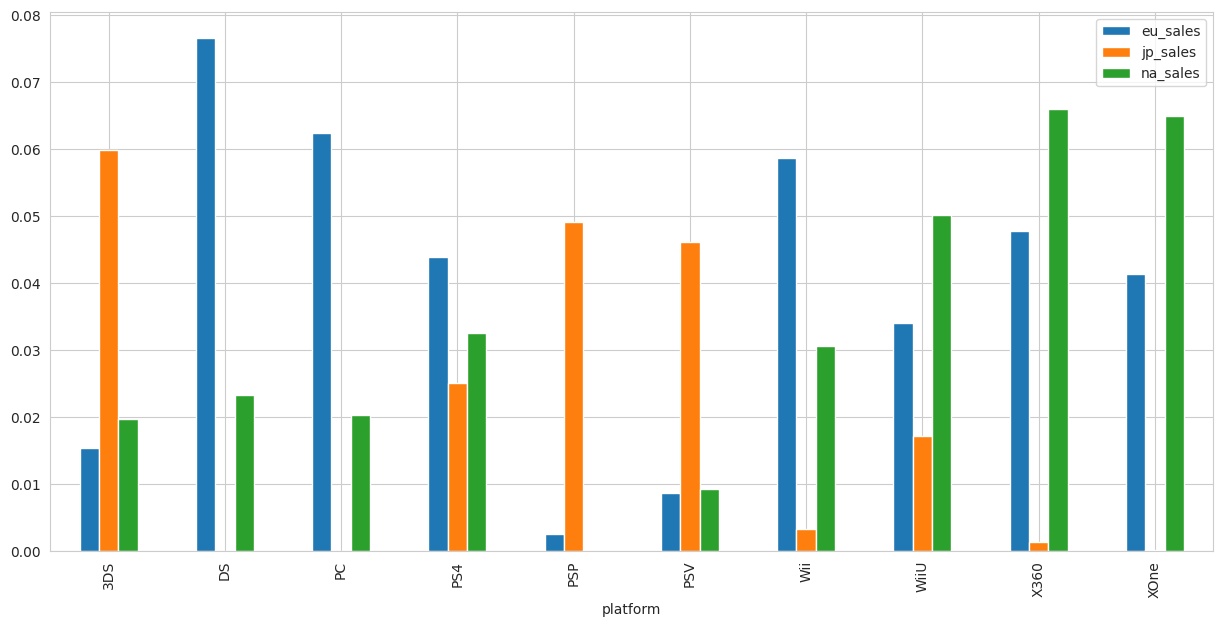

In [188]:
new_success_games.pivot_table(index='platform', values =['na_sales', 'eu_sales', 'jp_sales']).plot(kind = 'bar', figsize=(15, 7))

The graph shows that the most popular platforms in **NA** are (**X360, XOne, Wii, PS4**), **EU** - (**DS, PC, Wii, X360**) and **JP** - (**3DS, PSP, PSV, PS4, WiiU**). Sales by platform differ significantly, both in each individual region and when comparing all together.

Find the most popular genres by region.

<Axes: xlabel='genre'>

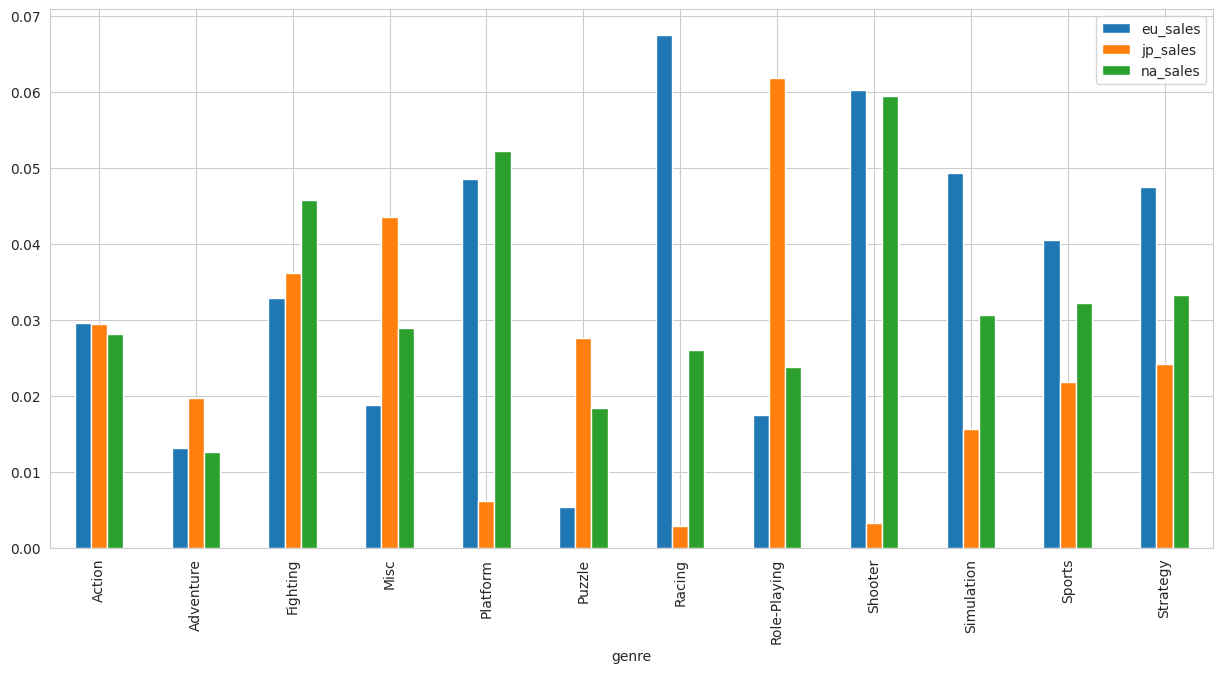

In [189]:
new_success_games.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales']).plot(kind = 'bar', figsize = (15, 7))

Top 5 popular genres in **NA** - (**Shooter, Platform, Fighting, Strategy, Sports**), **EU** - (**Raicing, Shooter, Simulation, Platform, Strategy**) and **JP** - (**Role-Playing, Misc, Fighting, Action, Puzzle**). The popular genres in the first two regions are generally similar, while the third shows a peculiar taste that the Japanese are famous for, probably due to the fact that people play in their free time on the way to or from work, and this is more convenient to do with small portable platforms that have already become part of the culture of Japan.

Let's find out if the **ESPB** rating affects sales in certain regions.

<Axes: xlabel='rating'>

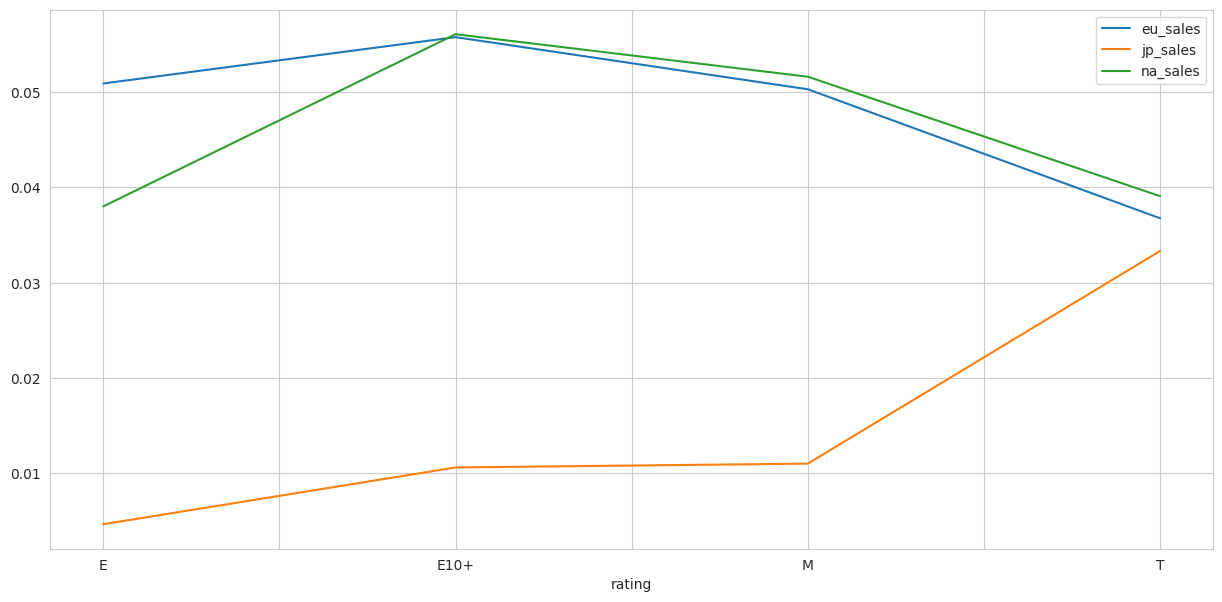

In [190]:
new_success_games.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales']).plot(figsize = (15, 7))

It can be stated that the rating affects sales! For example, games with an **E10+** rating are more in demand in the **EU** and **NA** regions (because the games are mostly played by children), while in **JP** they have minimal sales. At the same time, in **JP**, games with a **T** rating bring in the most sales, which indicates that games are predominantly played by a more adult audience.

# Stage 5. Research of statistical indicators

We need to find out how user rating and critic rating change in different genres.

Let's find the average value by genre.

In [191]:
mean_score = new_success_games.pivot_table(index = 'genre', values = ['critic_score', 'user_score'])
mean_score

,critic_score,user_score
genre,,
Action,68.190217,6.827679
Adventure,71.594595,7.397872
Fighting,66.608696,6.792308
Misc,73.380952,7.220833
Platform,70.037037,6.222581
Puzzle,73.400000,7.160000
Racing,70.131579,6.160000
Role-Playing,71.123288,7.357333
Shooter,66.478261,6.196226


Find out the variance and standard deviation.

In [192]:
np.var(mean_score, ddof = 1)

critic_score    12.417204
user_score       0.446018
dtype: float64

In [193]:
np.std(mean_score, ddof = 1)

critic_score    3.523805
user_score      0.667846
dtype: float64

<Axes: ylabel='Frequency'>

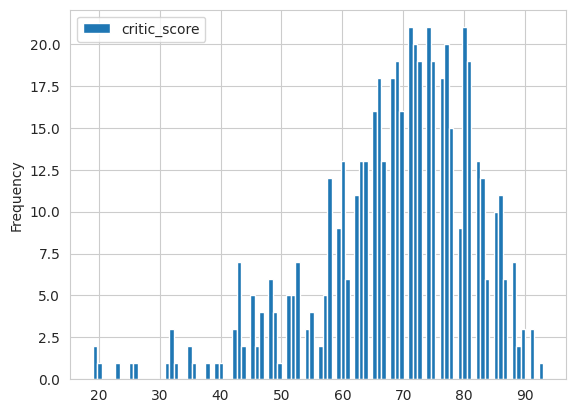

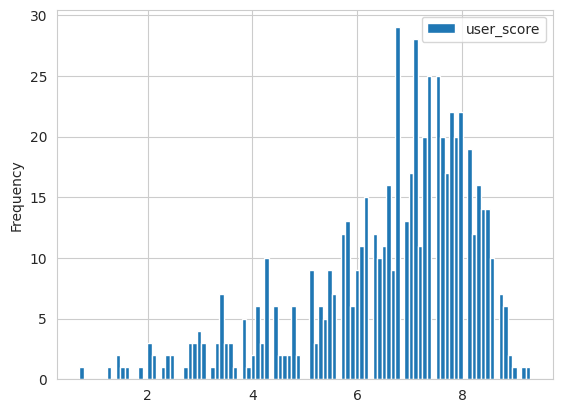

In [194]:
new_success_games.plot(x='genre', y=['critic_score'], kind='hist',bins = 100)
new_success_games.plot(x='genre', y=['user_score'], kind='hist',bins = 100)

From the histograms, you can see that the distribution of critics' and users' ratings is generally identical. The graph is skewed to the left, which means the median is greater than the mean.

# Stage 6. Hypothesis testing

Null Hypothesis **1**: The average user ratings of the **Xbox One** and **PC** platforms are the same, so the alternative hypothesis is that the ratings are different.

In [195]:
XOne = success_games.query('platform == "XOne"')
XOne.dropna(subset = ['user_score'], inplace = True)
PC = success_games.query('platform == "PC"')
PC.dropna(subset = ['user_score'], inplace = True)

In [196]:
alpha = .05
result_1 = st.ttest_ind(PC['user_score'],XOne['user_score'], equal_var = True)
print('P-value', result_1.pvalue)
if (result_1.pvalue < alpha):
  print('Rejecting the null hypothesis')
else:
  print('Failed to reject null hypothesis')

P-value 1.3896435533548819e-05
Rejecting the null hypothesis


It turns out that the average user ratings of the **Xbox One** and **PC** platforms are not the same, which proves an alternative hypothesis.

Null Hypothesis **2**: Average user ratings for the Action and Sports genres are different.

In [197]:
Action = success_games.query('genre == "Action"')
Action.dropna(subset = ['user_score'], inplace = True)
Sports = success_games.query('genre == "Sports"')
Sports.dropna(subset = ['user_score'], inplace = True)

In [198]:
alpha = .05
result_2 = st.ttest_ind(Sports['user_score'],Action['user_score'], equal_var = True)
print('P-value', result_2.pvalue)
if (result_2.pvalue < alpha):
  print('Rejecting the null hypothesis')
else:
  print('Failed to reject null hypothesis')

P-value 0.10406951359049141
Failed to reject null hypothesis


It turns out that the average user ratings of the **Action** and **Sports** genres are different, which proves the null hypothesis.

**Conclusion**

As a result of testing the first hypothesis, it was revealed that the average user ratings of the **Xbox One** and **PC** platforms are not the same, therefore, it was refuted. As a result of testing the second hypothesis, it turned out that the average user ratings of the **Action** and **Sports** genres are different, therefore, the hypothesis is confirmed.

# Stage 7. Research results

Working hypotheses:

*   the average user ratings of the **Xbox One** and **PC** platforms are the same;
*   the average user ratings for the **Action** and **Sports** genres are different.



**General results**

As a result of the study, it was revealed how many games were released in different years, how sales changed by platform. Platforms with the highest total sales were selected and their distribution by years was plotted. Previously popular platforms, which now have sales at zero - **NES**, **GB** and **GEN**, have been studied, and the period for which new ones appear and old platforms disappear is **10 years**. Top sellers and potentially profitable future platforms have been identified, such as: **PS4**, **PSV**, **3DS**, **XOne**, **PC**. The impact on sales of critical and user ratings for the **PS4** platform has been studied. The general distribution of games by genres has been built and the most profitable **Action** has been found. Profiles of users for different regions were compiled, it was determined that the **ESRB** rating affects game sales, for example, in the **JP** region. It was revealed that the average ratings of critics by genre vary in the range of **62 - 74** points, and user ratings in the range of **5.2 - 7.4** points (on a **10**-point scale).

As a result, the first hypothesis was refuted, and the second was confirmed.